In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format='{:,.2f}'.format

Bank clientdata:

1.age:Continuous feature 
2.job:Type of job (management, technician, entrepreneur, blue-collar, etc.)
3.marital: marital status(married, single, divorced)
4.education:education level (primary, secondary, tertiary)
5.default: has credit in default? 
6.housing: has housing loan? 
7.loan: has personal loan?
8.balance in accountRelated to previous contact:
9.contact: contact communication type
10.month: last contact month of year1
1.day: last contact day of the month
12.duration: last contact duration, in seconds*Other attributes:
13.campaign: number of contacts performed during this campaign and for this client
14.pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)
15.previous: number of times the client has been contacted before forthe last campaign to subscribe term deposit
16.poutcome: outcome of the previous marketing campaignOutput variable (desired target):
17.Target: Tell us has the client subscribed a term deposit. (Yes, No)


In [2]:
data=pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

# Univariate analysis

In [3]:
data.shape

(45211, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


In [6]:
data.skew()

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

dist. of all numerical variables are skewed, except Age. Need to transform or bin some of the variables

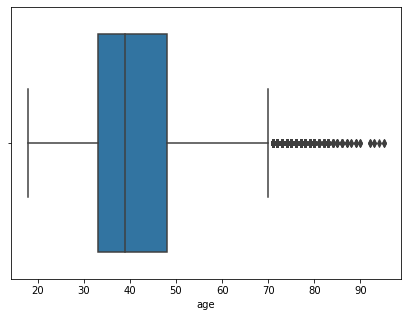

In [7]:
plt.figure(figsize = (7,5))
sns.boxplot(data['age'])

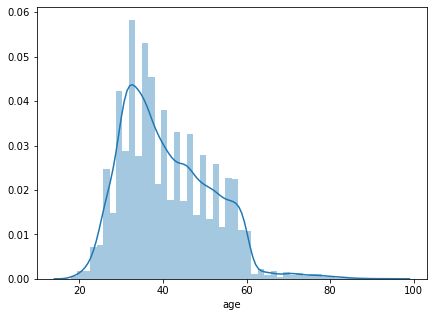

In [8]:
plt.figure(figsize = (7,5))
sns.distplot(data['age'])

alot of values are outside the InterQurtile range. 

In [9]:
data[data['age']>70]['Target'].value_counts(normalize=True)

no    0.55
yes   0.45
Name: Target, dtype: float64

In [10]:
data[data.age<70]['Target'].value_counts(normalize=True)

no    0.89
yes   0.11
Name: Target, dtype: float64

In [11]:
len(data[data['age']>70][data['Target']=='yes'])

218

people over 70 are outliers.                                     

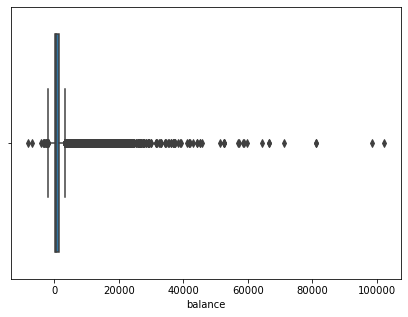

In [12]:
# balance

plt.figure(figsize = (7,5))
sns.boxplot(data['balance'])

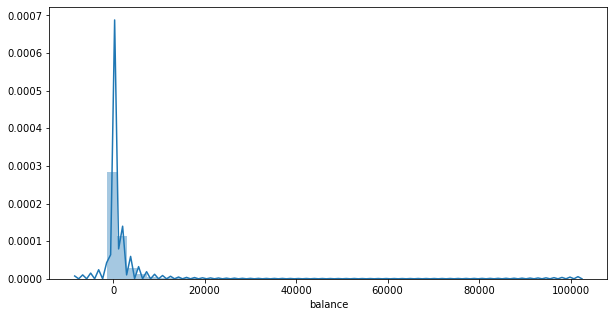

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(data['balance'])

alot of outliers

plt.figure(figsize = (5,5))
sns.distplot(data['balance'])

In [14]:
data[data['balance']<0]['Target'].value_counts(normalize=True)

no    0.94
yes   0.06
Name: Target, dtype: float64

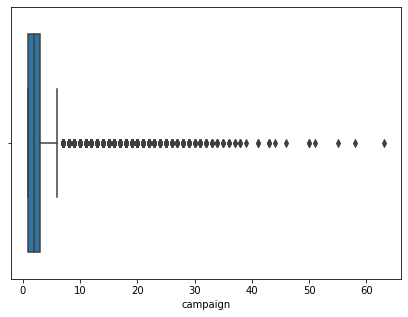

In [15]:
# campaign   

plt.figure(figsize = (7,5))
sns.boxplot(data['campaign'])

alot of outliers

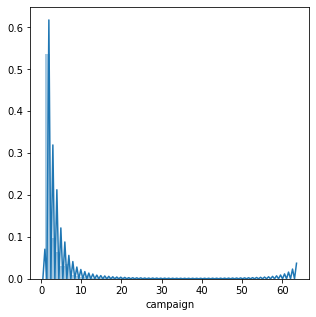

In [16]:
plt.figure(figsize = (5,5))
sns.distplot(data['campaign'])

Binning to be done for both of Balance and Campaign

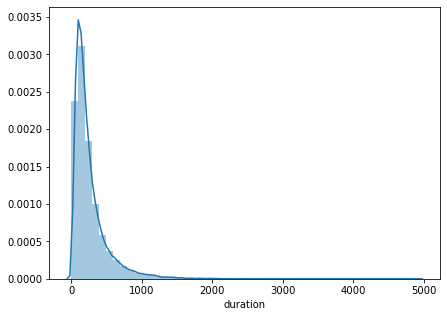

In [17]:
# duration    

plt.figure(figsize = (7,5))
sns.distplot(data['duration'])

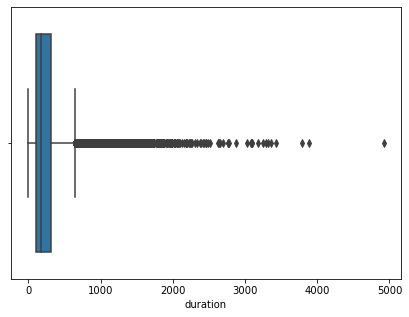

In [18]:
plt.figure(figsize = (7,5))
sns.boxplot(data['duration'])

In [19]:
data[data.duration>600]['Target'].value_counts(normalize=True)

no    0.52
yes   0.48
Name: Target, dtype: float64

In [20]:
data[data.duration>600]['Target'].shape[0]

3790

duration will be removed as it's considered as a noise

In [21]:
data.drop(['duration'],axis=1,inplace=True)

In [22]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [23]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [24]:
data.columns[data.dtypes=='object']

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [25]:
for q,f in enumerate(data.columns):
    if data[f].dtype!='int64':
        print(data.columns[q],'\n','--------------------','\n',data[f].value_counts(normalize=True),'\n','*******************************')

job 
 -------------------- 
 blue-collar     0.22
management      0.21
technician      0.17
admin.          0.11
services        0.09
retired         0.05
self-employed   0.03
entrepreneur    0.03
unemployed      0.03
housemaid       0.03
student         0.02
unknown         0.01
Name: job, dtype: float64 
 *******************************
marital 
 -------------------- 
 married    0.60
single     0.28
divorced   0.12
Name: marital, dtype: float64 
 *******************************
education 
 -------------------- 
 secondary   0.51
tertiary    0.29
primary     0.15
unknown     0.04
Name: education, dtype: float64 
 *******************************
default 
 -------------------- 
 no    0.98
yes   0.02
Name: default, dtype: float64 
 *******************************
housing 
 -------------------- 
 yes   0.56
no    0.44
Name: housing, dtype: float64 
 *******************************
loan 
 -------------------- 
 no    0.84
yes   0.16
Name: loan, dtype: float64 
 **************************

In [26]:
# default column will be dropped as 98% of people do not default in loan, so the attribute is not effective.
# poutcome column will be dropped as mos of the values are unknown.

#data.drop(['default'],axis=1,inplace=True)
data.drop(['poutcome'],axis=1,inplace=True)

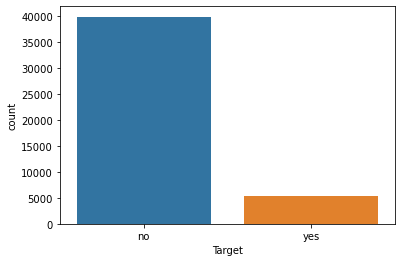

In [27]:
sns.countplot(data['Target'])

In [28]:
data['Target'].value_counts(normalize=True)

no    0.88
yes   0.12
Name: Target, dtype: float64

the response rate is only 12%, so the dependent variable Y has high class imbalance, so Accuracy will not be a reliable model performance measure.

FN is very critical for this bussiness case, as a client potentially will subscribe for the term deposit, but will be calssified as not suscriber.

so the most relevant model performance is Recall

# Bivariate Analysis

In [29]:
data_obj=data.select_dtypes('object')
data_obj

,job,marital,education,default,housing,loan,contact,month,Target
0,management,married,tertiary,no,yes,no,unknown,may,no
1,technician,single,secondary,no,yes,no,unknown,may,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,no
4,unknown,single,unknown,no,no,no,unknown,may,no
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,yes
45208,retired,married,secondary,no,no,no,cellular,nov,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,no


In [30]:
data.select_dtypes('int64')

,age,balance,day,campaign,pdays,previous
0,58,2143,5,1,-1,0
1,44,29,5,1,-1,0
2,33,2,5,1,-1,0
3,47,1506,5,1,-1,0
4,33,1,5,1,-1,0
...,...,...,...,...,...,...
45206,51,825,17,3,-1,0
45207,71,1729,17,2,-1,0
45208,72,5715,17,5,184,3
45209,57,668,17,4,-1,0


In [31]:
data.groupby('Target').mean()

,age,balance,day,campaign,pdays,previous
Target,,,,,,
no,40.84,"1,303.71",15.89,2.85,36.42,0.50
yes,41.67,"1,804.27",15.16,2.14,68.70,1.17


In [32]:
data.groupby('Target').median()

,age,balance,day,campaign,pdays,previous
Target,,,,,,
no,39,417,16,2,-1,0
yes,38,733,15,2,-1,0


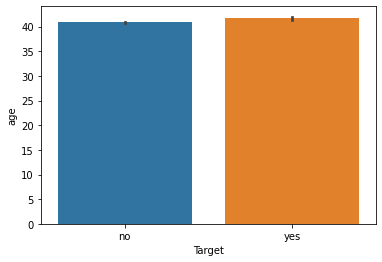

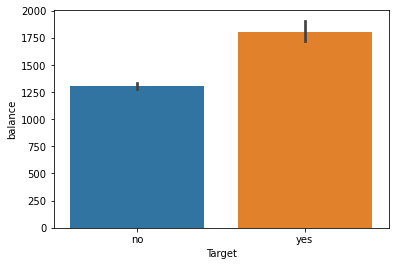

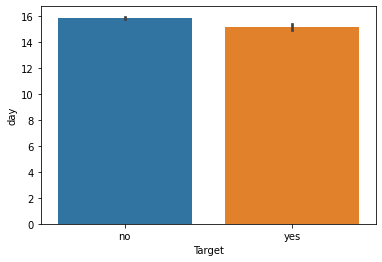

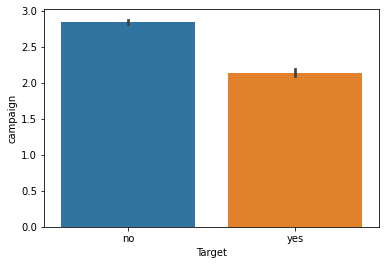

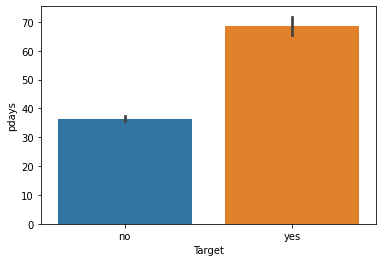

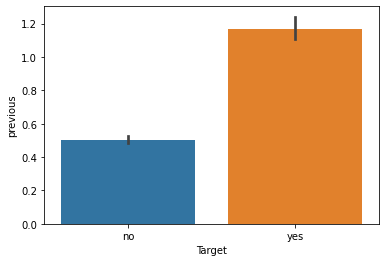

In [33]:
for i in data.columns[data.dtypes!='object']:
    sns.barplot(x='Target',y=i,data=data)
    plt.show()

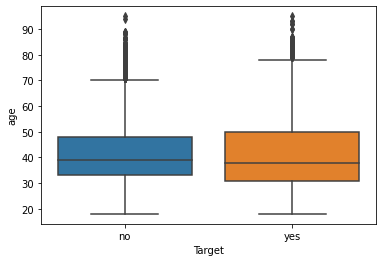

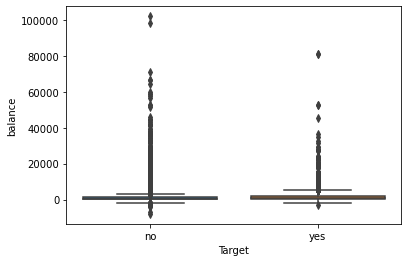

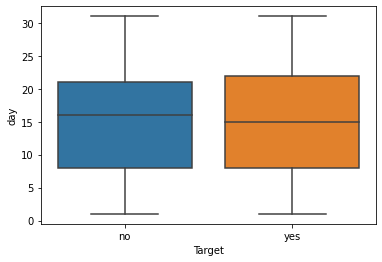

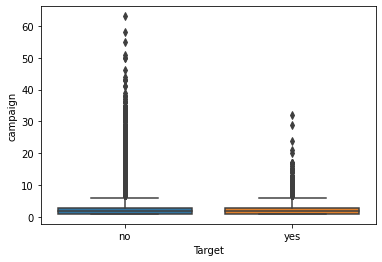

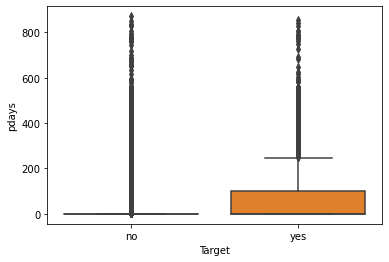

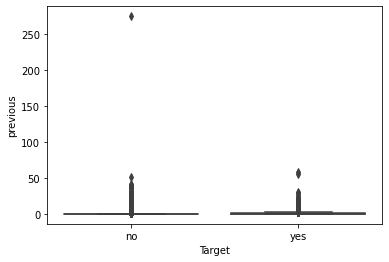

In [34]:
for i in ['age','balance','day','campaign','pdays','previous']:
    sns.boxplot(x='Target',y=i,data=data)
    plt.show()

# Bivariate Analysis for Categorical attributes

In [35]:
data_obj=data.select_dtypes('object')
data_obj

,job,marital,education,default,housing,loan,contact,month,Target
0,management,married,tertiary,no,yes,no,unknown,may,no
1,technician,single,secondary,no,yes,no,unknown,may,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,no
4,unknown,single,unknown,no,no,no,unknown,may,no
...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,yes
45208,retired,married,secondary,no,no,no,cellular,nov,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,no


In [36]:
pd.crosstab(data['job'],data['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
job,,
student,0.71,0.29
retired,0.77,0.23
unemployed,0.84,0.16
management,0.86,0.14
admin.,0.88,0.12
self-employed,0.88,0.12
unknown,0.88,0.12
technician,0.89,0.11
services,0.91,0.09


In [37]:
pd.crosstab(data['job'],data['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
job,,
student,0.71,0.29
retired,0.77,0.23
unemployed,0.84,0.16
management,0.86,0.14
admin.,0.88,0.12
self-employed,0.88,0.12
unknown,0.88,0.12
technician,0.89,0.11
services,0.91,0.09


the highest conversion rate is for students(29%), and lowest is for blue-collar(7%), focus should be more on students as they are most likely to subscribe for the term deposit.

In [38]:
pd.crosstab(data['marital'],data['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
marital,,
single,0.85,0.15
divorced,0.88,0.12
married,0.90,0.10


In [39]:
pd.crosstab(data['education'],data['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
education,,
tertiary,0.85,0.15
unknown,0.86,0.14
secondary,0.89,0.11
primary,0.91,0.09


In [40]:
pd.crosstab(data['contact'],data['Target'],normalize='index').sort_values(by='yes',ascending=False)


Target,no,yes
contact,,
cellular,0.85,0.15
telephone,0.87,0.13
unknown,0.96,0.04


In [41]:
pd.crosstab(data['month'],data['Target'],normalize='index').sort_values(by='yes',ascending=False)

Target,no,yes
month,,
mar,0.48,0.52
dec,0.53,0.47
sep,0.54,0.46
oct,0.56,0.44
apr,0.80,0.20
feb,0.83,0.17
aug,0.89,0.11
jun,0.90,0.10
nov,0.90,0.10


In [42]:
pd.crosstab(data['default'],data['Target'],normalize='index')

Target,no,yes
default,,
no,0.88,0.12
yes,0.94,0.06


In [43]:
data['default'].value_counts(normalize=True)

no    0.98
yes   0.02
Name: default, dtype: float64

the percentage of people who defaulted on loan is very small, 2%, so default column will be removed

In [44]:
data.drop(['default'],axis=1,inplace=True)

In [45]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,Target
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,1,-1,0,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,1,-1,0,no


In [46]:
pd.crosstab(data['housing'],data['Target'],normalize='index')

Target,no,yes
housing,,
no,0.83,0.17
yes,0.92,0.08


In [47]:
data['housing'].value_counts(normalize=True)

yes   0.56
no    0.44
Name: housing, dtype: float64

In [48]:
pd.crosstab(data['contact'],data['Target'],normalize='index')

Target,no,yes
contact,,
cellular,0.85,0.15
telephone,0.87,0.13
unknown,0.96,0.04


# Prepare Data for analytics

In [49]:
# to help having more categorical variables when the target is categorical

# Binning balance

data['balance'].describe()

count    45,211.00
mean      1,362.27
std       3,044.77
min      -8,019.00
25%          72.00
50%         448.00
75%       1,428.00
max     102,127.00
Name: balance, dtype: float64

# cut function
Pandas cut() function is used to separate the array elements into different bins . The cut function is mainly used to perform statistical analysis on scalar data.  

Syntax:cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates=”raise”,)Parameters:

x: The input array to be binned. Must be 1-dimensional.

bins: defines the bin edges for the segmentation.

right : (bool, default True )  Indicates whether bins includes the rightmost edge or not. If right == True (the default), then the bins [1, 2, 3, 4] indicate (1,2], (2,3], (3,4]. 

labels : (array or bool, optional)  Specifies the labels for the returned bins. Must be the same length as the resulting bins. If False, returns only integer indicators of the bins. 

retbins : (bool, default False) Whether to return the bins or not. Useful when bins is provided as a scalar.

In [50]:
bin_edges=[-8020,0,72,448,1428,102128]
bin_names=['very low','low','medium','high','very high']
data['balance']=pd.cut(data['balance'],bin_edges,labels=bin_names)

In [51]:
data['balance'].head(10)

0    very high
1          low
2          low
3    very high
4          low
5       medium
6       medium
7          low
8       medium
9         high
Name: balance, dtype: category
Categories (5, object): [very low < low < medium < high < very high]

In [52]:
# campaign

data['campaign'].describe()

count   45,211.00
mean         2.76
std          3.10
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         63.00
Name: campaign, dtype: float64

In [53]:
data[data['campaign']<=1].shape[0]

17544

In [54]:
data[data['campaign']==2].shape[0]

12505

In [55]:
data[data['campaign']==3].shape[0]

5521

In [56]:
data[data['campaign']>3].shape[0]

9641

In [57]:
bin_edges=[0,2,3,4,564]
bin_names=['<=2','3','4','>=4']
data['campaign']=pd.cut(data['campaign'],bin_edges,labels=bin_names)

In [58]:
data['campaign'].value_counts()

<=2    30049
>=4     6119
3       5521
4       3522
Name: campaign, dtype: int64

In [59]:
data['Target']=data['Target'].replace({'yes':1,'no':0})

#OR
#data['Target']=data['Target'].map({'yes':1,'no':0})

In [60]:
data['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [61]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,Target
0,58,management,married,tertiary,very high,yes,no,unknown,5,may,<=2,-1,0,0
1,44,technician,single,secondary,low,yes,no,unknown,5,may,<=2,-1,0,0
2,33,entrepreneur,married,secondary,low,yes,yes,unknown,5,may,<=2,-1,0,0
3,47,blue-collar,married,unknown,very high,yes,no,unknown,5,may,<=2,-1,0,0
4,33,unknown,single,unknown,low,no,no,unknown,5,may,<=2,-1,0,0


# splitting data

In [62]:
x=data.drop(['Target'],axis=1)


In [63]:
x.head()


,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous
0,58,management,married,tertiary,very high,yes,no,unknown,5,may,<=2,-1,0
1,44,technician,single,secondary,low,yes,no,unknown,5,may,<=2,-1,0
2,33,entrepreneur,married,secondary,low,yes,yes,unknown,5,may,<=2,-1,0
3,47,blue-collar,married,unknown,very high,yes,no,unknown,5,may,<=2,-1,0
4,33,unknown,single,unknown,low,no,no,unknown,5,may,<=2,-1,0


In [64]:
y=data['Target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [65]:
x=pd.get_dummies(x,drop_first=True)
x.columns

Index(['age', 'day', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'balance_low', 'balance_medium', 'balance_high', 'balance_very high',
       'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'campaign_3', 'campaign_4', 'campaign_>=4'],
      dtype='object')

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [68]:
x_train.shape,x_test.shape

((31647, 42), (13564, 42))

# create the ensemble model

In [69]:
algo=[]
tr=[]
te=[]
recall=[]
precision=[]
roc=[]

# Blanks list to store model name, training score, testing score, recall, precision, roc

# Logestic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score

In [71]:
log_m=LogisticRegression(random_state=7)
log_m.fit(x_train,y_train)
y_pred=log_m.predict(x_test)
algo.append('Logestic Regression')
tr.append(log_m.score(x_train,y_train))
te.append(log_m.score(x_test,y_test))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
roc.append(roc_auc_score(y_test,y_pred))
print(log_m.score(x_test,y_test),recall_score(y_test,y_pred),precision_score(y_test,y_pred))

0.8855057505160719 0.07040417209908735 0.4595744680851064


# Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
algo.append('Decision Tree')
tr.append(dt_model.score(x_train,y_train))
te.append(dt_model.score(x_test,y_test))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
roc.append(roc_auc_score(y_test,y_pred))
print(dt_model.score(x_test,y_test),recall_score(y_test,y_pred),precision_score(y_test,y_pred))

0.8361840165143025 0.34028683181225555 0.30138568129330257


 Decision tree is a non-parametric algorithm and hence prone to overfitting easily, this is evident from the difference
in scores in training and testing. in ensemble techniques, we want multiple instances (each different from the other) and
each instance to overfit hopefully, the different instances will do different mistakes in classification and when we club them
their errors will get cancelled out giving us the benefit of lower bias and lower overall variance error.

In [73]:
dt_model2=DecisionTreeClassifier(criterion='entropy',random_state=7,max_depth=3,min_samples_leaf=5)
dt_model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=7)

In [74]:
# calculating features importance

feat_cols=x_train.columns
feat_import=dt_model.tree_.compute_feature_importances(normalize=False)
#-----------------------------------------------------------------------------
# zip function:
#a = ("John", "Charles", "Mike")
#b = ("Jenny", "Christy", "Monica", "Vicky")
#x = zip(a, b)
#use the tuple() function to display a readable version of the result:
#print(tuple(x))
#output:
#(('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica'))

feat_imp_dict=dict(zip(feat_cols,dt_model2.feature_importances_))


In [75]:
tuple(zip(feat_cols,dt_model2.feature_importances_))

(('age', 0.0),
 ('day', 0.009430081665718626),
 ('pdays', 0.3220637687170182),
 ('previous', 0.0),
 ('job_blue-collar', 0.0),
 ('job_entrepreneur', 0.0),
 ('job_housemaid', 0.0),
 ('job_management', 0.0),
 ('job_retired', 0.0),
 ('job_self-employed', 0.0),
 ('job_services', 0.0),
 ('job_student', 0.0),
 ('job_technician', 0.0),
 ('job_unemployed', 0.0),
 ('job_unknown', 0.0),
 ('marital_married', 0.0),
 ('marital_single', 0.0),
 ('education_secondary', 0.0),
 ('education_tertiary', 0.0),
 ('education_unknown', 0.0),
 ('balance_low', 0.0),
 ('balance_medium', 0.0),
 ('balance_high', 0.0),
 ('balance_very high', 0.0),
 ('housing_yes', 0.203764192284398),
 ('loan_yes', 0.0),
 ('contact_telephone', 0.0),
 ('contact_unknown', 0.3965762325397128),
 ('month_aug', 0.0),
 ('month_dec', 0.0),
 ('month_feb', 0.0),
 ('month_jan', 0.0),
 ('month_jul', 0.0),
 ('month_jun', 0.0),
 ('month_mar', 0.03954203081752478),
 ('month_may', 0.0),
 ('month_nov', 0.009763475299456847),
 ('month_oct', 0.018860218

In [76]:
dict(zip(feat_cols,dt_model2.feature_importances_))

{'age': 0.0,
 'day': 0.009430081665718626,
 'pdays': 0.3220637687170182,
 'previous': 0.0,
 'job_blue-collar': 0.0,
 'job_entrepreneur': 0.0,
 'job_housemaid': 0.0,
 'job_management': 0.0,
 'job_retired': 0.0,
 'job_self-employed': 0.0,
 'job_services': 0.0,
 'job_student': 0.0,
 'job_technician': 0.0,
 'job_unemployed': 0.0,
 'job_unknown': 0.0,
 'marital_married': 0.0,
 'marital_single': 0.0,
 'education_secondary': 0.0,
 'education_tertiary': 0.0,
 'education_unknown': 0.0,
 'balance_low': 0.0,
 'balance_medium': 0.0,
 'balance_high': 0.0,
 'balance_very high': 0.0,
 'housing_yes': 0.203764192284398,
 'loan_yes': 0.0,
 'contact_telephone': 0.0,
 'contact_unknown': 0.3965762325397128,
 'month_aug': 0.0,
 'month_dec': 0.0,
 'month_feb': 0.0,
 'month_jan': 0.0,
 'month_jul': 0.0,
 'month_jun': 0.0,
 'month_mar': 0.03954203081752478,
 'month_may': 0.0,
 'month_nov': 0.009763475299456847,
 'month_oct': 0.018860218676170687,
 'month_sep': 0.0,
 'campaign_3': 0.0,
 'campaign_4': 0.0,
 'cam

In [77]:
feat_imp=pd.DataFrame.from_dict(feat_imp_dict,orient='index')
feat_imp.sort_values(by=0,ascending=False)[0:10] # first top 10 features

,0
contact_unknown,0.40
pdays,0.32
housing_yes,0.20
month_mar,0.04
month_oct,0.02
month_nov,0.01
day,0.01
month_feb,0.00
balance_very high,0.00
loan_yes,0.00


In [78]:
preds_pruned=dt_model2.predict(x_test)
preds_pruned_train=dt_model2.predict(x_train)

In [79]:
dt_model2.score(x_train,y_train)

0.8816949473883781

In [80]:
print('training accuracy:',accuracy_score(y_train,preds_pruned_train))
print('testing accuracy:',accuracy_score(y_test,preds_pruned))
print('Recall:',recall_score(y_test,preds_pruned))

training accuracy: 0.8816949473883781
testing accuracy: 0.8867590681214981
Recall: 0.012385919165580182


In [81]:
# Decision Tree Classifier using entropy, adding the values in the list

model=DecisionTreeClassifier(criterion='entropy',random_state=7,max_depth=3,min_samples_leaf=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

algo.append('Decision Tree entropy')
tr.append(model.score(x_train,y_train))
te.append(model.score(x_test,y_test))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
roc.append(roc_auc_score(y_test,y_pred))
print(model.score(x_test,y_test),recall_score(y_test,y_pred),precision_score(y_test,y_pred))

0.8867590681214981 0.012385919165580182 0.475


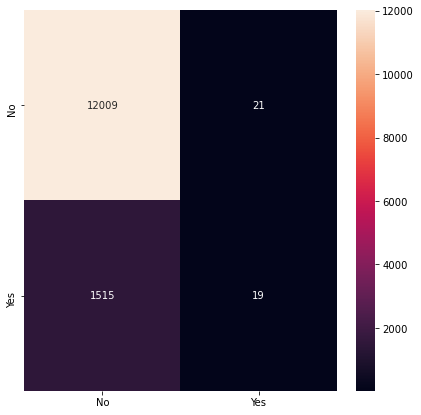

In [82]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                         columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [83]:
# Decision Tree Classifier using gini, adding the values in the list

model=DecisionTreeClassifier(criterion='gini',random_state=7,max_depth=3,min_samples_leaf=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

algo.append('Decision Tree gini')
tr.append(model.score(x_train,y_train))
te.append(model.score(x_test,y_test))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
roc.append(roc_auc_score(y_test,y_pred))
print(model.score(x_test,y_test),recall_score(y_test,y_pred),precision_score(y_test,y_pred))

0.886685343556473 0.025423728813559324 0.48148148148148145


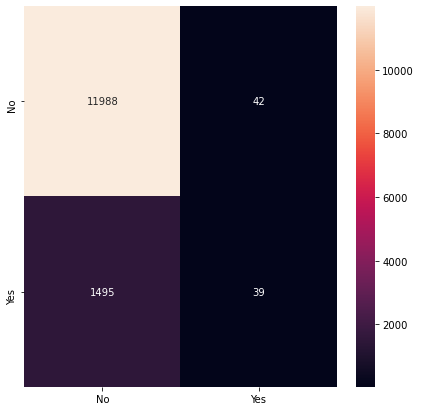

In [84]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                         columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [85]:
# Decision Tree Classifier using gini balanced, adding the values in the list

model=DecisionTreeClassifier(criterion='gini',random_state=7,max_depth=3,min_samples_leaf=5,class_weight='balanced')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

algo.append('Decision Tree gini_balanced')
tr.append(model.score(x_train,y_train))
te.append(model.score(x_test,y_test))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
roc.append(roc_auc_score(y_test,y_pred))
print(model.score(x_test,y_test),recall_score(y_test,y_pred),precision_score(y_test,y_pred))

0.6584340902388676 0.6049543676662321 0.18728557013118063


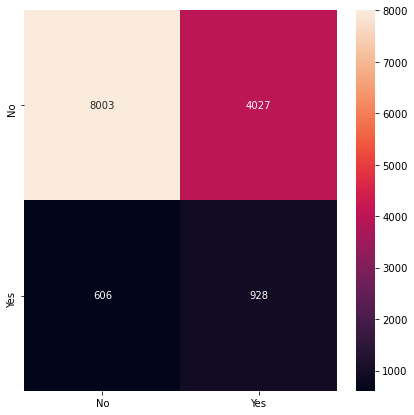

In [86]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                         columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [87]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=7,n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

algo.append('Random Forest')
tr.append(model.score(x_train,y_train))
te.append(model.score(x_test,y_test))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
roc.append(roc_auc_score(y_test,y_pred))
print(model.score(x_test,y_test),recall_score(y_test,y_pred),precision_score(y_test,y_pred))

0.8880123857269242 0.19491525423728814 0.5128644939965694


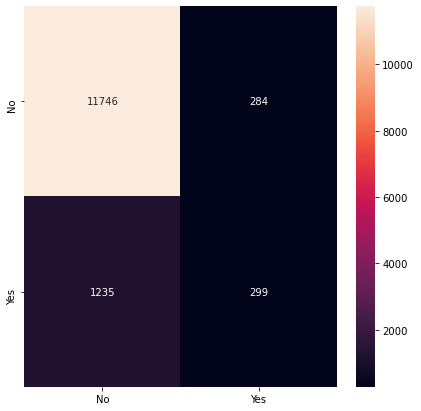

In [88]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                         columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [89]:
# Bagging

from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(random_state=7,n_estimators=100,max_samples=.7,bootstrap=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

algo.append('Bagging')
tr.append(model.score(x_train,y_train))
te.append(model.score(x_test,y_test))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
roc.append(roc_auc_score(y_test,y_pred))
print(model.score(x_test,y_test),recall_score(y_test,y_pred),precision_score(y_test,y_pred))

0.8852845768209967 0.2288135593220339 0.48480662983425415


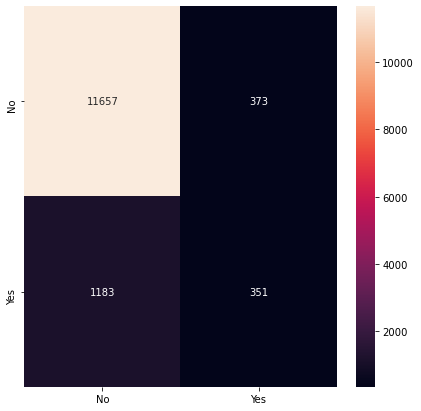

In [90]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                         columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [91]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state=7,n_estimators=200,learning_rate=0.1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

algo.append('AdaBoost')
tr.append(model.score(x_train,y_train))
te.append(model.score(x_test,y_test))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
roc.append(roc_auc_score(y_test,y_pred))
print(model.score(x_test,y_test),recall_score(y_test,y_pred),precision_score(y_test,y_pred))

0.8872751400766735 0.038461538461538464 0.5221238938053098


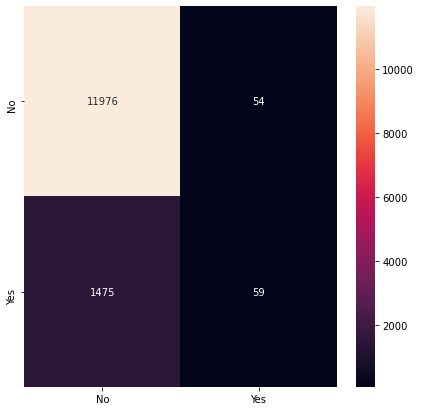

In [92]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                         columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [93]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(random_state=7,n_estimators=200)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

algo.append('AdaBoost')
tr.append(model.score(x_train,y_train))
te.append(model.score(x_test,y_test))
recall.append(recall_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
roc.append(roc_auc_score(y_test,y_pred))
print(model.score(x_test,y_test),recall_score(y_test,y_pred),precision_score(y_test,y_pred))

0.8902241226776763 0.20925684485006518 0.5376884422110553


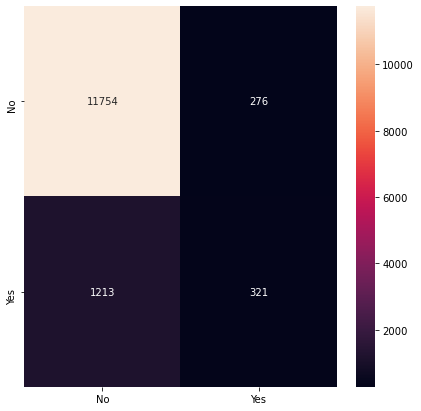

In [94]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                         columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [95]:
# compare different techniques results:

results=pd.DataFrame()
results['Model']=algo
results['Training Score']=tr
results['Testing Score']=te
results['Recall']=recall
results['precision']=precision
results['ROC AUC Score']=roc
results=results.set_index('Model')
results.sort_values(by='Recall',ascending=False)

,Training Score,Testing Score,Recall,precision,ROC AUC Score
Model,,,,,
Decision Tree gini_balanced,0.66,0.66,0.60,0.19,0.64
Decision Tree,1.00,0.84,0.34,0.30,0.62
Bagging,0.99,0.89,0.23,0.48,0.60
AdaBoost,0.90,0.89,0.21,0.54,0.59
Random Forest,1.00,0.89,0.19,0.51,0.59
Logestic Regression,0.88,0.89,0.07,0.46,0.53
AdaBoost,0.88,0.89,0.04,0.52,0.52
Decision Tree gini,0.88,0.89,0.03,0.48,0.51
Decision Tree entropy,0.88,0.89,0.01,0.47,0.51
